In [1]:
import numpy as np

import halo
import tool_images as tim

import matplotlib.pylab as plt
from astropy.convolution import Gaussian2DKernel

import importlib
import warnings
# warnings.simplefilter('ignore', UserWarning)
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)


In [6]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 30)
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.size'] = 20
plt.rcParams['xtick.minor.size'] = 8
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 7
plt.rcParams['ytick.minor.size'] = 7
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.right'] = True 
plt.rcParams['figure.figsize'] = (7.0, 7.0)      # Determina o tamanho do plot dentro do ipython notebook\n",

plt.rcParams['xtick.major.width']  = 1
plt.rcParams['ytick.major.width']  = 1

# Summary

1. Importing data
    1. [CII] - ALMA
    2. HST data
    3. Dust
2. 

# Importing data

Importando as imagens disponíveis do ALMA ([CII] e poeira) e HST. 

###  [CII] - ALMA

In [7]:
CII_array = !ls ../CII/*Natural*FWTM* # <<<<<<<<<<<<<<<<<<<<<<<<<< it needs to be a list

CII moment-0 map files:
 ['../CII/Cristal_05_TM1_TM2_ALPINE_ALL_Contsub_CollapsedCII_Natural_FWTM_JvM.fits']


###  HST

In [8]:
HST_array = !ls ../HST-COSMOS/C05_DEIMOS_COSMOS/*f*w*sci* # <<<<<<<<<<<<<<<<<<<<<<<<<< it needs to be a list
print('rest-UV maps:\n',HST_array)

rest-UV maps:
 ['../HST-COSMOS/C05_DEIMOS_COSMOS/C05_DEIMOS_COSMOS_683613_f105w_drz_sci.fits', '../HST-COSMOS/C05_DEIMOS_COSMOS/C05_DEIMOS_COSMOS_683613_f125w_drz_sci.fits', '../HST-COSMOS/C05_DEIMOS_COSMOS/C05_DEIMOS_COSMOS_683613_f160w_drz_sci.fits', '../HST-COSMOS/C05_DEIMOS_COSMOS/C05_DEIMOS_COSMOS_683613_ir_drz_sci.fits']


###  Dust -  ALMA

In [9]:
dust_array = !ls ../Continuum/*Natural* # <<<<<<<<<<<<<<<<<<<<<<<<<< it needs to be a list

print('dust maps:\n',dust_array)

dust maps:
 ['../Continuum/Cristal_05_TM1_TM2_ALPINE_ALL_Continuum_Clean_Natural_image.fits', '../Continuum/Cristal_05_TM1_TM2_ALPINE_ALL_Continuum_Clean_Natural_JvM.fits']


# Functions

1. Sigma CII
2. Sigma UV
3. Sigma dust

# Setting eccentricity and ring width

### Eccentricity

Fitei a gaussiana e me baseei na ecentricidade da fonte convoluido. 



ra:    10:00:09.4243 +/- 0.0011 s (0.0167 arcsec along great circle)

dec: +002.20.13.8162 +/- 0.0265 arcsec

ra:  629.69 +/- 0.68 pixels

dec: 623.21 +/- 1.08 pixels
   
**Image component size (convolved with beam) ---**

major axis FWHM:     755 +/- 68 marcsec

minor axis FWHM:     427 +/- 30 marcsec

position angle: 154.8 +/- 4.7 deg
   
**Clean beam size ---**

major axis FWHM: 0.33 arcsec

minor axis FWHM: 0.27 arcsec

position angle: 57.14 deg

**Image component size (deconvolved from beam) ---**

major axis FWHM:     703 +/- 74 marcsec

minor axis FWHM:     270 +/- 51 marcsec

position angle: 154.2 +/- 4.7 deg

   
**Flux ---**

Integrated:   1.65 +/- 0.16 mJy

Peak:         465 +/- 37 uJy/beam

Polarization: I

   

In [10]:
eccentricity_source = np.sqrt(1 - (0.427/0.755)**2) # <<<<<<<<<<<<<<<<<<<<<<<<<< calculate de eccentricity 

print('Eccentricity source:',eccentricity_source)

Eccentricity source: 0.8247051536232214


**Beam information:**

b$_{maj}$ = 0.331964" 

b$_{min}$ = 0.273895"

b$_{PA}$ = 57.138 deg

In [ ]:
eccentricity_beam = np.sqrt(1 - (0.274/0.332)**2) # <<<<<<<< NOT NECESSARY

print('Eccentricity beam:',eccentricity_beam)

Eccentricity beam: 0.5646927671963309


In [12]:
eccentricity = eccentricity_source

In [13]:
position_angle = 154.2 + 90

### Ring width

Analisar como funciona os erros

Testar 1: onde comecar a primeira elipse




# Run radial profile

In [3]:
major_array = np.arange(0.3,3.3,0.3) # <<<<<<<<<<<<<<<<<<< in arcsecs define the major axis of the ellipse annulus
major_array

array([0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ])

### [CII]

In [17]:
importlib.reload(halo)
sig_cii, sig_cii_error = halo.run_ALMA(path_HST             = HST_array,
                                       path_ALMA            = CII_array,
                                       b_array              = major_array,
                                       eccen_galaxy         = eccentricity,
                                       bpa_galaxy           = position_angle,
                                       show_diagnosis       = True,
                                       use_convolved_image  = True)

### HST

In [30]:
importlib.reload(halo)
sig_hst, sig_hst_error =  halo.run_HST(path_HST             = HST_array,
                                       path_ALMA            = CII_array,
                                       b_array              = major_array,
                                       eccen_galaxy         = eccentricity,
                                       bpa_galaxy           = position_angle,
                                       show_diagnosis       = True,
                                       use_convolved_image  = True)



### Dust

In [19]:
importlib.reload(halo)
sig_dust, sig_dust_error = halo.run_ALMA(path_HST            = HST_array,
                                         path_ALMA           = dust_array,
                                         b_array             = major_array ,
                                         eccen_galaxy        = eccentricity,
                                         bpa_galaxy          = position_angle,
                                         show_diagnosis      = True,
                                         use_convolved_image =True)

# Plot radial profiles

Text(0.5, 1.0, 'CII emission')

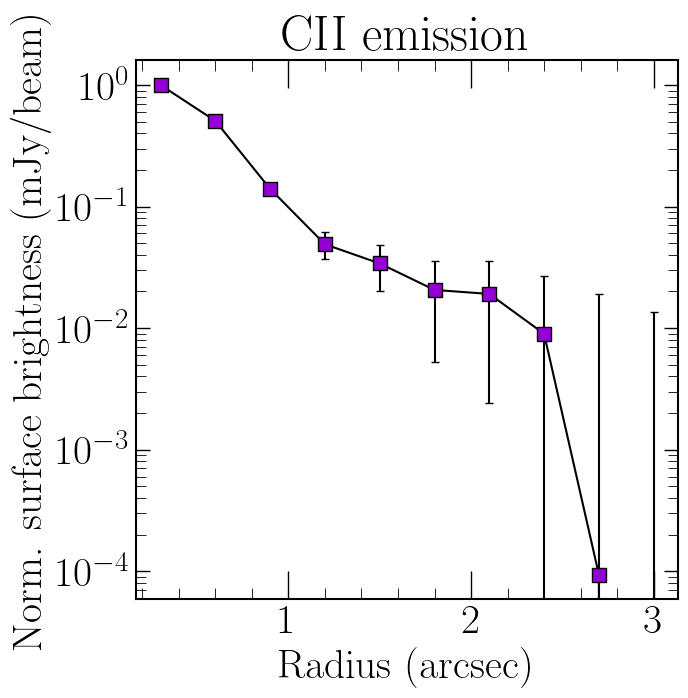

In [20]:
name_cii = ['Natural', 'Natural JvM']


sigma_array = np.array(sig_cii[1:], dtype = np.float64)
sigma_error_array = np.array(sig_cii_error[1:], dtype = np.float64)

plt.errorbar(major_array , sigma_array/sigma_array[0], yerr = sigma_error_array/sigma_array[0], capsize = 3, color = 'black')
plt.scatter(major_array , sigma_array/sigma_array[0], label = ' '.join(sig_cii[0].split('_')[2:]), marker = 's', 
            edgecolor = 'black', facecolor = 'darkviolet', zorder =10, s = 100)
    
plt.xlabel("Radius (arcsec)")
plt.ylabel("Norm. surface brightness (mJy/beam)")
#plt.legend()
plt.yscale('log')
plt.title('CII emission')

In [1]:
# <<<<<<<<<<<<<<<<<< ESSE AQUI DE BAIXO É DO HST, TÁ UMA BAGUNCA, MODIFICA PRA PLOTAR SÓ UMA FIGURA

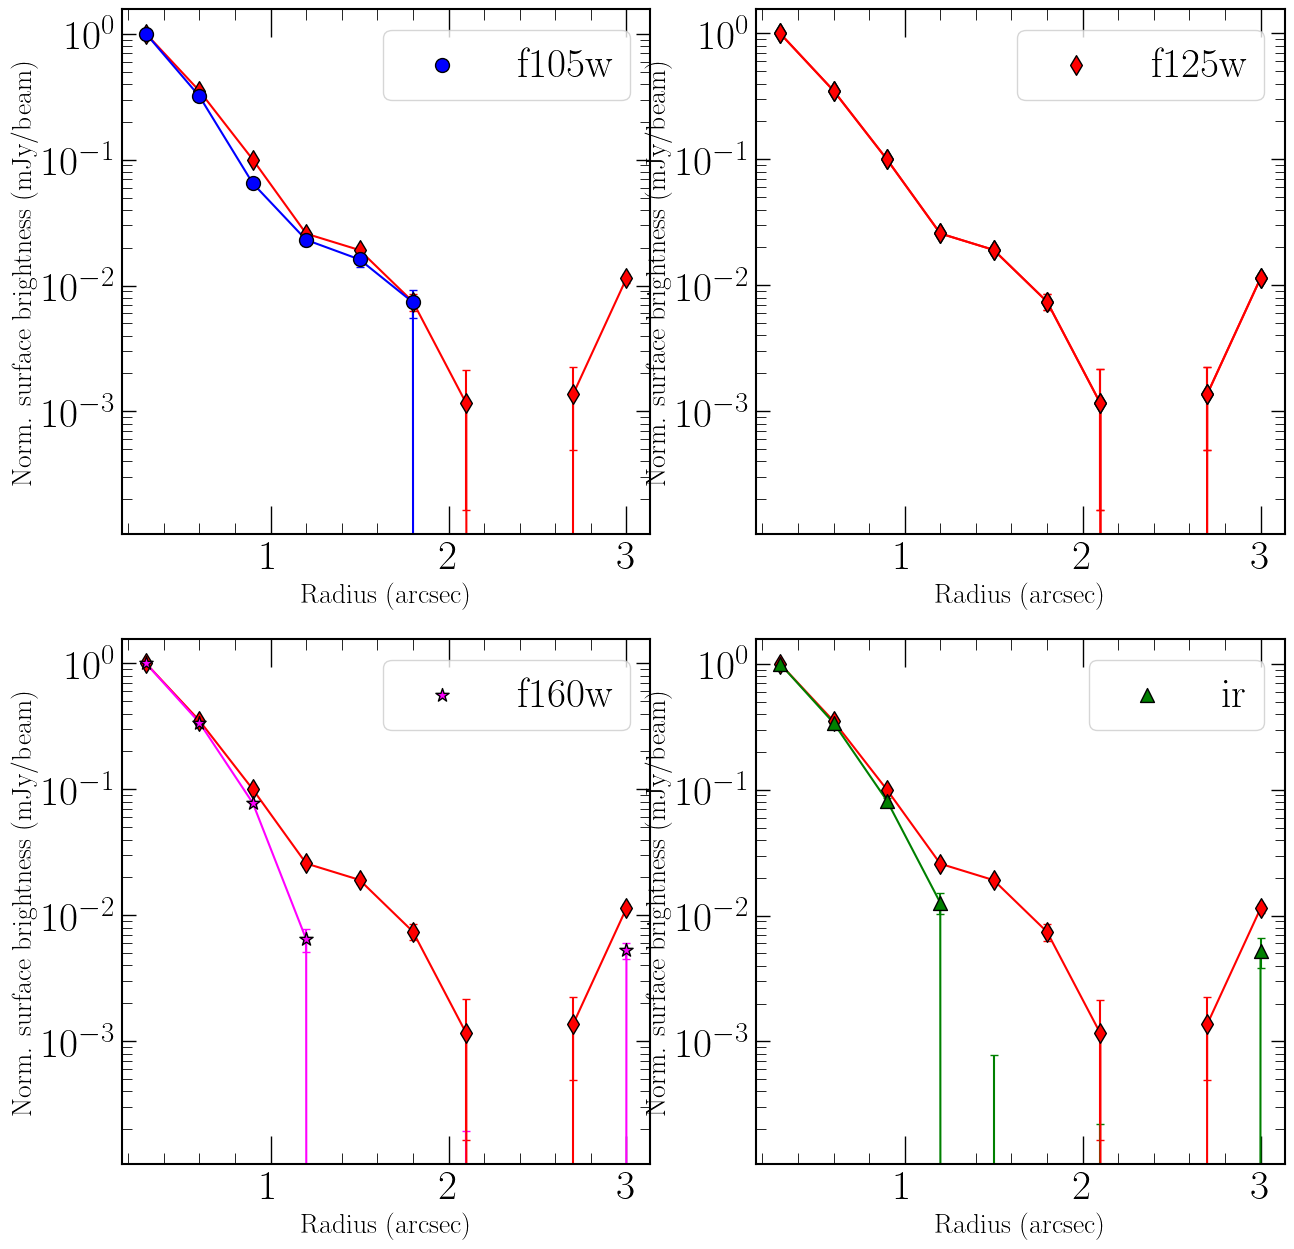

In [31]:

plt.figure(figsize =(15,15))


for y_index in range(len(sig_hst)):
    
    plt.subplot(2,2,y_index+1)
    
    for x_index in range(1,2):#range(len(sig_hst)):
        
        sigma_array = np.array(sig_hst[x_index][1:], dtype = np.float64)
        sigma_error_array = np.array(sig_hst_error[x_index][1:], dtype = np.float64)
        
        plt.scatter(major_array , sigma_array/sigma_array[0], marker = list_marker[x_index], facecolor = list_color[x_index],
                    edgecolor = 'black', s = 100, zorder = 10 , alpha = 1)
        plt.errorbar(major_array , sigma_array/sigma_array[0], yerr = sigma_error_array/sigma_array[0], capsize = 3, alpha = 1, color =list_color[x_index] )
    
    sigma_array = np.array(sig_hst[y_index][1:], dtype = np.float64)
    sigma_error_array = np.array(sig_hst_error[y_index][1:], dtype = np.float64)
    
    plt.scatter(major_array , sigma_array/sigma_array[0], marker = list_marker[y_index], facecolor = list_color[y_index],
                    edgecolor = 'black', s = 100, label =  sig_hst_error[y_index][0], zorder = 10 )
    plt.errorbar(major_array , sigma_array/sigma_array[0], yerr = sigma_error_array/sigma_array[0], capsize = 3, color =list_color[y_index] )

    plt.legend(fontsize = 30)
    plt.xlabel("Radius (arcsec)", fontsize = 20)
    #plt.ylim( 1e-15 ,1e-4)
    plt.yscale('log')
    plt.ylabel("Norm. surface brightness (mJy/beam)", fontsize = 20)

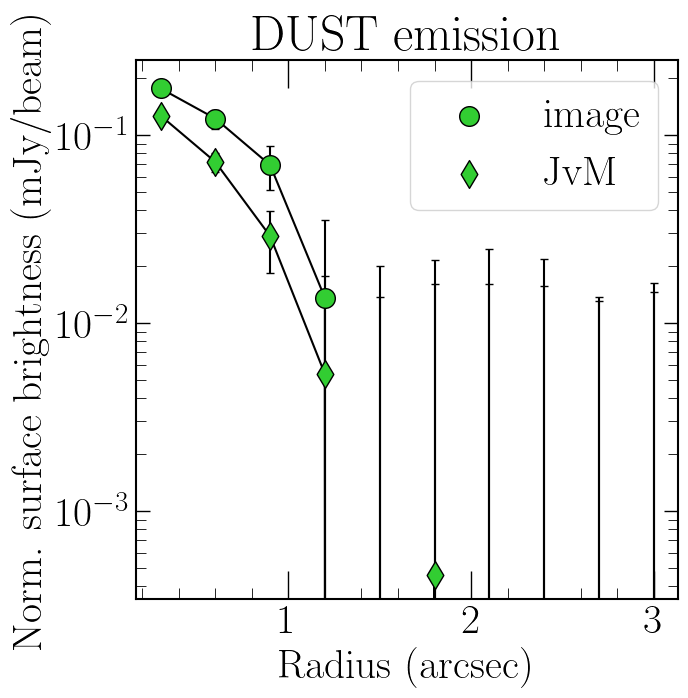

In [33]:
for y_index in range(len(sig_dust)):
    
    
    sigma_array = np.array(sig_dust[y_index][1:], dtype = np.float64)
    sigma_error_array = np.array(sig_dust_error[y_index][1:], dtype = np.float64)
    
    plt.scatter(major_array , sigma_array, marker = list_marker[y_index], facecolor = 'limegreen',
                    edgecolor = 'black', s = 200, label =  sig_dust[y_index][0].split('_')[-1], zorder = 10 )
    plt.errorbar(major_array , sigma_array, yerr = sigma_error_array, capsize = 3, color ='black' )
    
    
    #plt.scatter(major_array , sigma_array/sigma_array[0], label = sig_dust[y_index][0].split('_')[-1])
    #plt.errorbar(major_array , sigma_array/sigma_array[0], yerr = sigma_error_array/sigma_array[0], capsize = 3)
    #
plt.legend()
plt.xlabel("Radius (arcsec)")
plt.ylabel("Norm. surface brightness (mJy/beam)")
plt.title('DUST emission')
plt.yscale('log')

# radial profile of the Beam

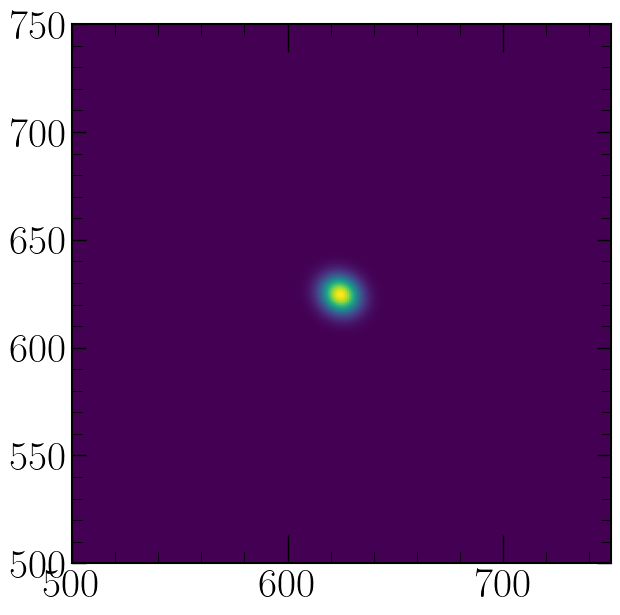

In [35]:

data_aux, header_aux,  wcs_aux,  pix_scale_aux,  bmaj_aux, bmin_aux, bpa_aux, rms_aux,  imagesize_aux = tim.import_fits_ALMA(CII_array[0])


#Set sigma
sigma_maj_ALMA_in_ALMA = (0.36/2.355)/(pix_scale_aux)
sigma_min_ALMA_in_ALMA = (0.32/2.355)/(pix_scale_aux)
    

    
beam_ALMA_in_ALMA = Gaussian2DKernel(x_stddev = sigma_maj_ALMA_in_ALMA, 
                                    y_stddev=  sigma_min_ALMA_in_ALMA, 
                                    theta = ((57.138 +90) * np.pi)/180,
                                    x_size = imagesize_aux,
                                    y_size = imagesize_aux)
plt.imshow(beam_ALMA_in_ALMA, cmap = 'viridis' )


plt.xlim(500,750)
plt.ylim(500,750)

major_array_beam = np.arange(0.3,2.6,0.1)
sigma_beam = np.array([])
e_0_central = 0.8
for rad in range(len(major_array_beam)):
    if rad == 0:


        major_a = major_array_beam[rad]
        minor_b = major_array_beam[rad]*np.sqrt(1 - e_0_central **2)

        array_radius = [major_a,minor_b]

        t_aper = 'ellipse'

    else:

        major_a_in = major_array_beam[rad - 1]
        minor_b_in = major_array_beam[rad - 1]*np.sqrt(1 - e_0_central **2)
        major_a_out = major_array_beam[rad]
        minor_b_out = major_array_beam[rad]*np.sqrt(1 - e_0_central **2)

        array_radius = [major_a_in ,major_a_out, minor_b_out,minor_b_in]

        t_aper = 'annulus'


    sig, err = halo.sigma_CII(data = np.array(beam_ALMA_in_ALMA),
                           wcs = wcs_aux,
                           pixel_scale = pix_scale_aux,
                           radius = array_radius,
                           position = (150.0393068,2.3371765),
                           type_aper = t_aper,
                           bmaj = 0.36,
                           bmin = 0.32,
                              theta_galaxy = np.pi*(57.138+90)/180)
    sigma_beam = np.append(sigma_beam, sig)


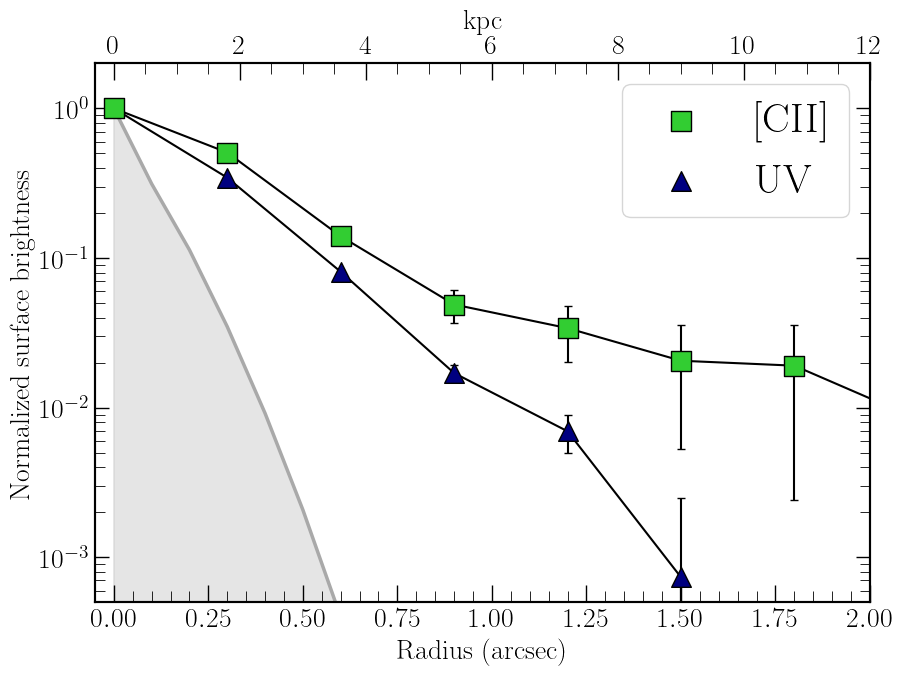

In [84]:
fig = plt.figure(figsize = (10,7))
from mpl_toolkits.axes_grid.inset_locator import inset_axes
#gs = gridspec.GridSpec(ncols=1, nrows=2)

#plot_images(211)

ax0 = plt.subplot(111)#ax0 = plt.subplot(gs[1:])



### CII
sigma_array = np.array(sig_cii[1:], dtype = np.float64)
sigma_error_array = np.array(sig_cii_error[1:], dtype = np.float64)

plt.errorbar(major_array - major_array[0], sigma_array/sigma_array[0], yerr = sigma_error_array/sigma_array[0], capsize = 3, color = 'black')
plt.scatter(major_array - major_array[0], sigma_array/sigma_array[0], label = '[CII]', marker = 's', 
            edgecolor = 'black', facecolor = 'limegreen', zorder =20, s = 200)



    
sigma_array = np.array(sig_hst[y_index][1:], dtype = np.float64)
#sigma_error_array = np.array(sig_hst_error[y_index][1:], dtype = np.float64)

#plt.scatter(major_array -  major_array[0] + 0.02, mean_sigma/mean_sigma[0] , marker = list_marker[y_index], facecolor = list_color[y_index],
#                edgecolor = 'black', s = 200, label =  sig_hst_error[y_index][0], zorder = 10 )
#plt.errorbar(major_array -  major_array[0] + 0.02, sigma_array/sigma_array[0], yerr = sigma_error_array/sigma_array[0], capsize = 3, color =list_color[y_index] )
    
    
    
sigma_array = np.median(np.array(sig_hst[:, 1:], dtype = np.float64), axis = 0)
sigma_error_array = np.sqrt(np.square(np.array(sig_hst_error[:, 1:], dtype = np.float64)).sum(axis = 0)/sig_hst_error[:, 1:].shape[0])

plt.errorbar(major_array - major_array[0], sigma_array/sigma_array[0], yerr = error_median/sigma_array[0], capsize = 3, color = 'black')
plt.scatter(major_array - major_array[0], sigma_array/sigma_array[0], label = 'UV', marker = '^', 
            edgecolor = 'black', facecolor = 'navy', zorder =10, s = 200)



#sigma_array = np.array(sig_hst[2][1:], dtype = np.float64)
#sigma_error_array = np.array(sig_hst_error[2][1:], dtype = np.float64)
#plt.errorbar(major_array - major_array[0], array_area_f160w_error/sigma_array[0], yerr=1e-2, ls = ' ',  uplims = True, ecolor = list_color[2])

plt.legend(fontsize = 30) 
ax = plt.plot(major_array_beam- major_array_beam[0],sigma_beam/sigma_beam[0], lw = 2.5, color = 'darkgray')
plt.fill_between(major_array_beam - major_array_beam[0],0,sigma_beam/sigma_beam[0], color = 'darkgray', alpha = 0.3, zorder = 1) #- major_array_beam[0]


plt.ylim(5e-4,2)
plt.xlim(-0.05,2)

#plt.yticks([0.01,0.1,1], ['0.01','0.1','1'])
plt.ylabel('Normalized surface brightness')
plt.xlabel('Radius (arcsec)')
ax1 = ax0.twiny()
plt.xlim(-0.05,2)

plt.xticks(np.arange(0,14,2)/5.961,np.arange(0,14,2))

plt.xlabel('kpc')

#plt.yticks([0.01,0.1,1], ['0.01','0.1','1'])
plt.yscale('log')



plt.savefig('02-surface-profile-median.pdf', dpi = 300, bbox_inches = 'tight')
plt.savefig('02-surface-profile-median.png', dpi = 300, bbox_inches = 'tight')